In [1]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
%matplotlib inline

# Importar as bibliotecas necessárias: destaque para pytorch

import torch, torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
# from grayscale_alexnet import AlexNet
import time

import os

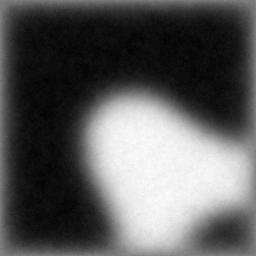

In [2]:
pil_image = Image.open('../data/treino/low_temp/img_transf_lt_3.jpg')
pil_image

In [3]:
pil2tensor = transforms.ToTensor()
tensor2pil = transforms.ToPILImage()

In [4]:
rgb_image = pil2tensor(pil_image)
rgb_image

tensor([[[0.5020, 0.5020, 0.5020,  ..., 0.4745, 0.4902, 0.5137],
         [0.4941, 0.4941, 0.4902,  ..., 0.4745, 0.4863, 0.5059],
         [0.4824, 0.4824, 0.4784,  ..., 0.4706, 0.4784, 0.4980],
         ...,
         [0.5059, 0.5020, 0.4941,  ..., 0.4706, 0.4784, 0.4902],
         [0.5059, 0.5020, 0.4980,  ..., 0.4824, 0.4902, 0.4941],
         [0.5059, 0.5059, 0.5020,  ..., 0.4902, 0.4941, 0.4980]]])

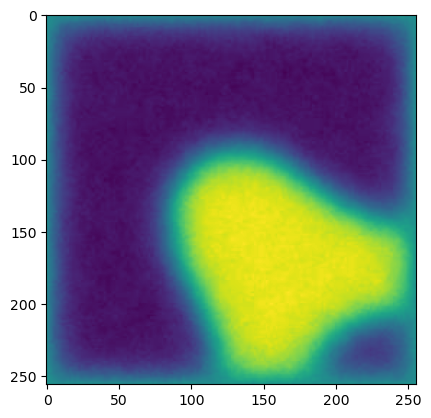

Image type: torch.FloatTensor
Image size: torch.Size([1, 256, 256])


In [5]:
def plot_image(tensor):
    plt.figure()
    # imshow needs a numpy array with the channel dimension
    # as the the last dimension so we have to transpose things.
    plt.imshow(tensor.numpy().transpose(1, 2, 0))
    plt.show()

plot_image(rgb_image)

# Show the image tensor type and tensor size here.
print('Image type: ' + str(rgb_image.type()))
print('Image size: ' + str(rgb_image.size()))

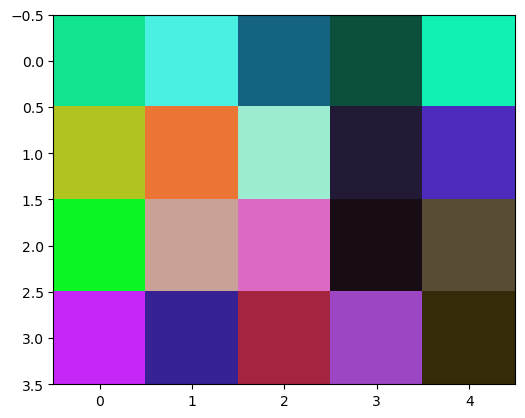

In [6]:
tensor = torch.rand((3, 4, 5))  # Exemplo com 3 canais, altura 4 e largura 5

# Convertendo para NumPy e realizando a transposição
numpy_array = tensor.numpy().transpose(1, 2, 0)

plt.imshow(numpy_array)

## Essencialmente, essa operação de transposição troca a ordem das dimensões,
#  sendo útil, por exemplo, quando estamos trabalhando com imagens em Tensores no formato (canais, altura, largura) 
# e desejamos convertê-las para o formato comum de imagens no NumPy (altura, largura, canais).

In [7]:
# Carregar as imagens
# Determinar as pastas de treino, validação e teste

dataset = r'../data/'

pasta_treino = os.path.join(dataset, 'treino')
pasta_validacao = os.path.join(dataset, 'validacao')
pasta_teste = os.path.join(dataset, 'teste')

In [9]:
image_size = 100

transformacoes_de_imagens = { 
    'treino': transforms.Compose([
        transforms.Resize(size=[image_size, image_size]),
        transforms.ToTensor(),
    ]),
    'validacao': transforms.Compose([
        transforms.Resize(size=[image_size, image_size]),
        transforms.ToTensor(),
    ]),
    'teste': transforms.Compose([
        transforms.Resize(size=[image_size, image_size]),
        transforms.ToTensor(),
    ])
}

In [10]:
# Carregar as imagens usando o datasets do torchvision
data = {
    'treino': datasets.ImageFolder(root=pasta_treino, transform=transformacoes_de_imagens['treino']),
    'validacao': datasets.ImageFolder(root=pasta_validacao, transform=transformacoes_de_imagens['validacao']),
    'teste': datasets.ImageFolder(root=pasta_teste, transform=transformacoes_de_imagens['teste'])
}

In [14]:
data

{'treino': Dataset ImageFolder
     Number of datapoints: 144
     Root location: ../data/treino
     StandardTransform
 Transform: Compose(
                Resize(size=[100, 100], interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ),
 'validacao': Dataset ImageFolder
     Number of datapoints: 36
     Root location: ../data/validacao
     StandardTransform
 Transform: Compose(
                Resize(size=[100, 100], interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ),
 'teste': Dataset ImageFolder
     Number of datapoints: 20
     Root location: ../data/teste
     StandardTransform
 Transform: Compose(
                Resize(size=[100, 100], interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            )}

In [15]:
# Mapear os índices com os nomes das classes (entregue e devolvido)
indice_para_classe = {v: k for k, v in data['treino'].class_to_idx.items()}
print(indice_para_classe)

{0: 'high_temp', 1: 'low_temp'}


In [35]:
# Quantidade de imagens para serem utilizados para calcular erro médio e acurácia
num_imagens_treino = len(data['treino'])
num_imagens_validacao = len(data['validacao'])

In [38]:
# Cria os DataLoaders para treino e validação
bs=8

data_loader_treino = DataLoader(data['treino'], batch_size=bs, shuffle=True)
data_loader_validacao = DataLoader(data['validacao'], batch_size=bs, shuffle=True)
data_loader_teste = DataLoader(data['teste'], batch_size=3, shuffle=True)

5

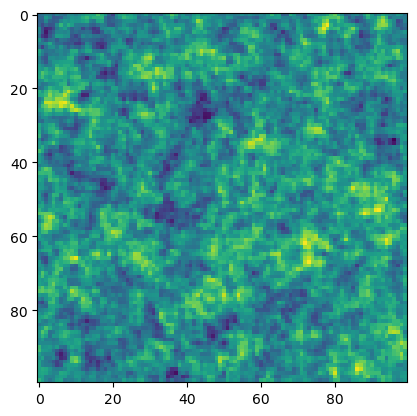

In [59]:
for batch in data_loader_treino:
    plt.imshow(batch[0][0][0])

In [61]:
import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Camadas convolucionais
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.fc1 = nn.Linear(32 * 25 * 25, 128)  # Calculado para entrada 100x100
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 2)  # Duas classes na saída

    def forward(self, x):
        # Passagem direta pela rede
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = x.view(-1, 32 * 25 * 25)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x

# Parâmetros da rede neural
input_channels = 3  # Para imagens RGB
image_size = 100  # Tamanho da imagem (largura e altura iguais)
batch_size = 8  # Tamanho do batch

# Criando uma instância da rede neural
model = SimpleCNN()

# Exibindo a arquitetura da rede neural
print(model)

# Exemplo de entrada para verificar a saída da rede
example_input = torch.randn(batch_size, input_channels, image_size, image_size)
output = model(example_input)
print("Saída da rede para um exemplo de entrada:", output.shape)


SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (fc1): Linear(in_features=20000, out_features=128, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)
Saída da rede para um exemplo de entrada: torch.Size([8, 2])


In [62]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import FakeData  # Usaremos dados falsos para demonstração

# Parâmetros da rede neural
input_channels = 3  # Para imagens RGB
image_size = 100  # Tamanho da imagem (largura e altura iguais)
batch_size = 8  # Tamanho do batch
learning_rate = 0.001
epochs = 5

# Função de perda (entropia cruzada binária para classificação binária)
criterion = nn.CrossEntropyLoss()

# Criando uma instância da rede neural
model = SimpleCNN()

# Otimizador (usaremos Adam)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Dataset de exemplo (FakeData para demonstração)
# Substitua pelo seu próprio dataset usando torchvision.datasets ou outro dataset customizado
dataset = FakeData(transform=transforms.ToTensor())

# DataLoader para carregar os dados
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Função de treinamento
def train(model, dataloader, criterion, optimizer, epochs):
    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(dataloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 10 == 9:  # Print a cada 10 batches
                print(f"Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 10:.4f}")
                running_loss = 0.0

# Treinamento da rede
train(model, dataloader, criterion, optimizer, epochs)


RuntimeError: shape '[-1, 20000]' is invalid for input of size 802816